In [2]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

#igmoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Train.csv')
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,NaN,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,NaN,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,NaN,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,NaN,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,19910074,4.859812,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,40.683213,-73.936660,"Cozy, quiet and comfortable 1BR",Bedford-Stuyvesant,74,98.0,https://a0.muscache.com/im/pictures/82012373/2...,11233,1.0,1.0
10605,18431451,5.273000,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,True,...,40.711808,-73.956471,2BR/1BA:Great Location Williamsburg,Williamsburg,62,93.0,https://a0.muscache.com/im/pictures/73156354/c...,11211,2.0,2.0
10606,8683858,5.075174,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",Kitchen,Heating,...",4,1.0,Real Bed,strict,True,...,40.590441,-73.813383,Rockaway Beach Paradise Apartment,The Rockaways,54,96.0,https://a0.muscache.com/im/pictures/a7ea44fa-d...,11693,1.0,2.0
10607,766700,5.631212,Guesthouse,Private room,"{""Cable TV"",Internet,""Wireless Internet"",Gym,E...",2,2.0,Real Bed,flexible,False,...,37.788889,-122.409001,Ste 1502-1 Queen Bedrm & Living Rm,Union Square,1,100.0,https://a0.muscache.com/im/pictures/ed4e8326-f...,94102,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 29 columns):
id                        10609 non-null int64
log_price                 10609 non-null float64
property_type             10609 non-null object
room_type                 10609 non-null object
amenities                 10609 non-null object
accommodates              10609 non-null int64
bathrooms                 10447 non-null float64
bed_type                  10609 non-null object
cancellation_policy       10609 non-null object
cleaning_fee              10609 non-null bool
city                      10609 non-null object
description               10609 non-null object
first_review              7676 non-null object
host_has_profile_pic      10578 non-null object
host_identity_verified    10578 non-null object
host_response_rate        7928 non-null object
host_since                10578 non-null object
instant_bookable          10609 non-null object
last_review               8297 

In [5]:
# increasing maximum display count to view all columns
pd.options.display.max_columns = None

In [6]:
#find the missing values
data.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                  162
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              2933
host_has_profile_pic        31
host_identity_verified      31
host_response_rate        2681
host_since                  31
instant_bookable             0
last_review               2312
latitude                     0
longitude                    0
name                         0
neighbourhood             1940
number_of_reviews            0
review_scores_rating      2446
thumbnail_url             3152
zipcode                    145
bedrooms                     9
beds                        16
dtype: int64

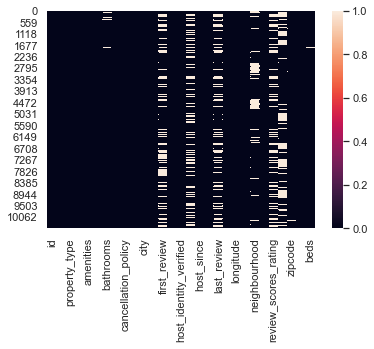

In [7]:
#Null values can also be shown with the help of heatmap
sns.heatmap(data.isnull(), cmap='rocket')

# Exploratory Data Analysis

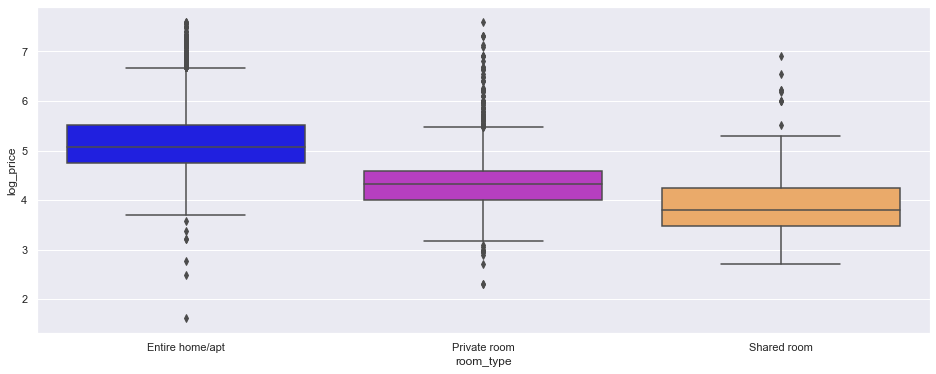

In [8]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['room_type'], data['log_price'], palette="gnuplot2")

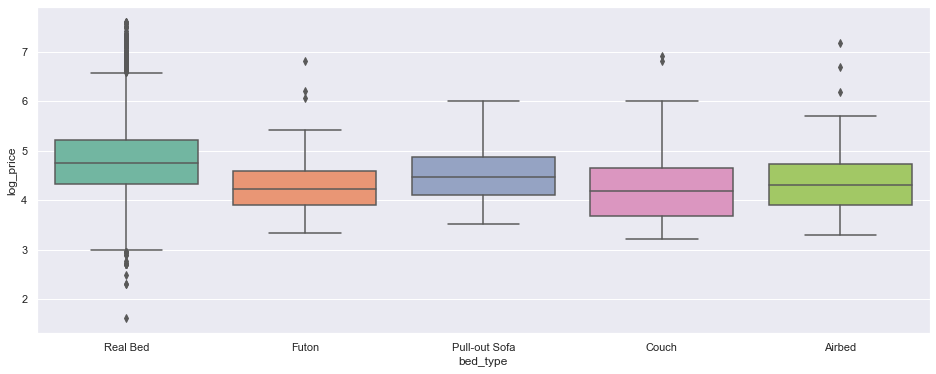

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['bed_type'], data['log_price'], palette="Set2")

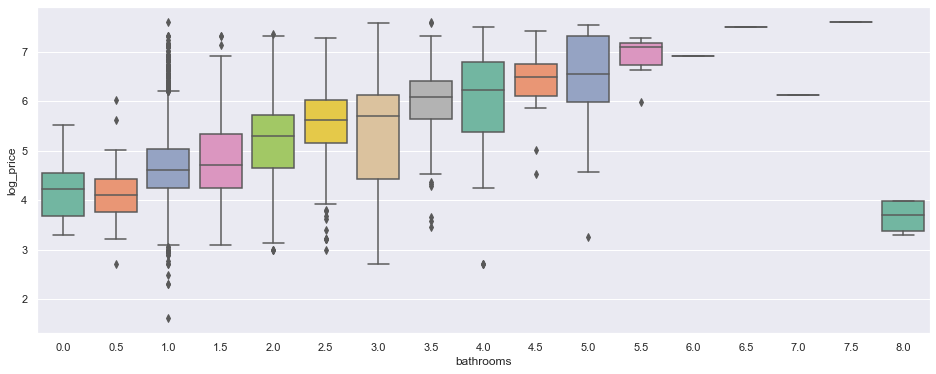

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['bathrooms'], data['log_price'], palette="Set2")

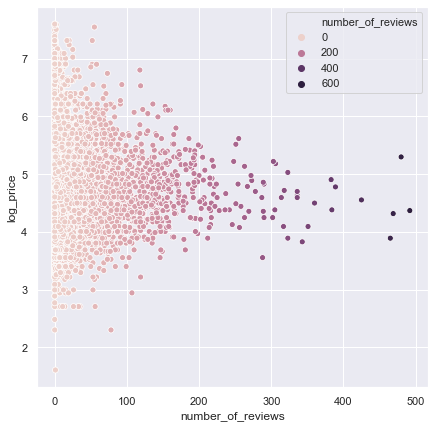

In [11]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=data, x="number_of_reviews", y="log_price",  hue="number_of_reviews")

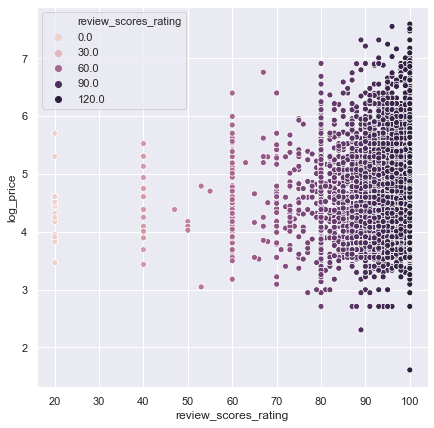

In [12]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=data, x="review_scores_rating", y="log_price",  hue="review_scores_rating")

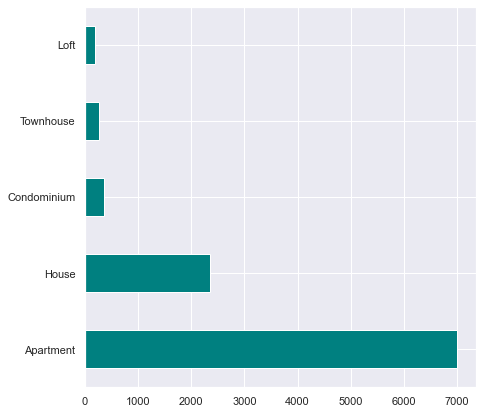

In [13]:
plt.figure(figsize=(16, 6))
import matplotlib.pyplot as plt
data['property_type'].value_counts().head().plot(kind='barh', figsize=(7,7), color='teal')

Text(0.5, 1.0, 'Cleaning_fee')

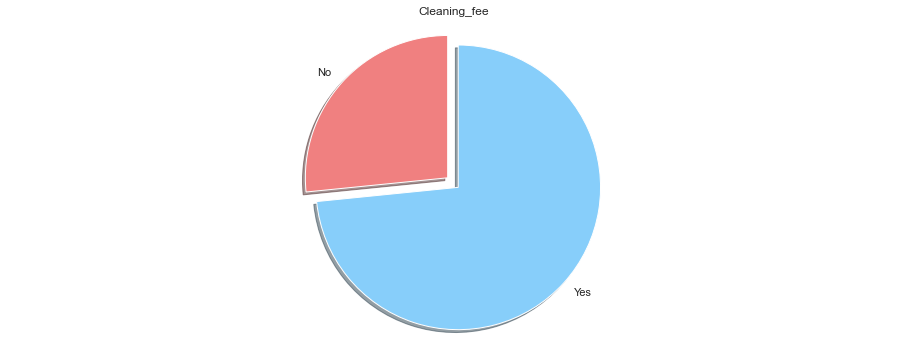

In [14]:
plt.figure(figsize=(16, 6))
# Matplotlib Pie Chart
import matplotlib.pyplot as plt
x_labels = ['No', 'Yes']
y = [19708,54403]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)   # "explode" the forth slice by 0.2
plt.pie(y, labels=x_labels, explode=explode, shadow=True, startangle=90, colors=colors)
plt.axis('equal')   # Draw a circle
plt.title('Cleaning_fee')

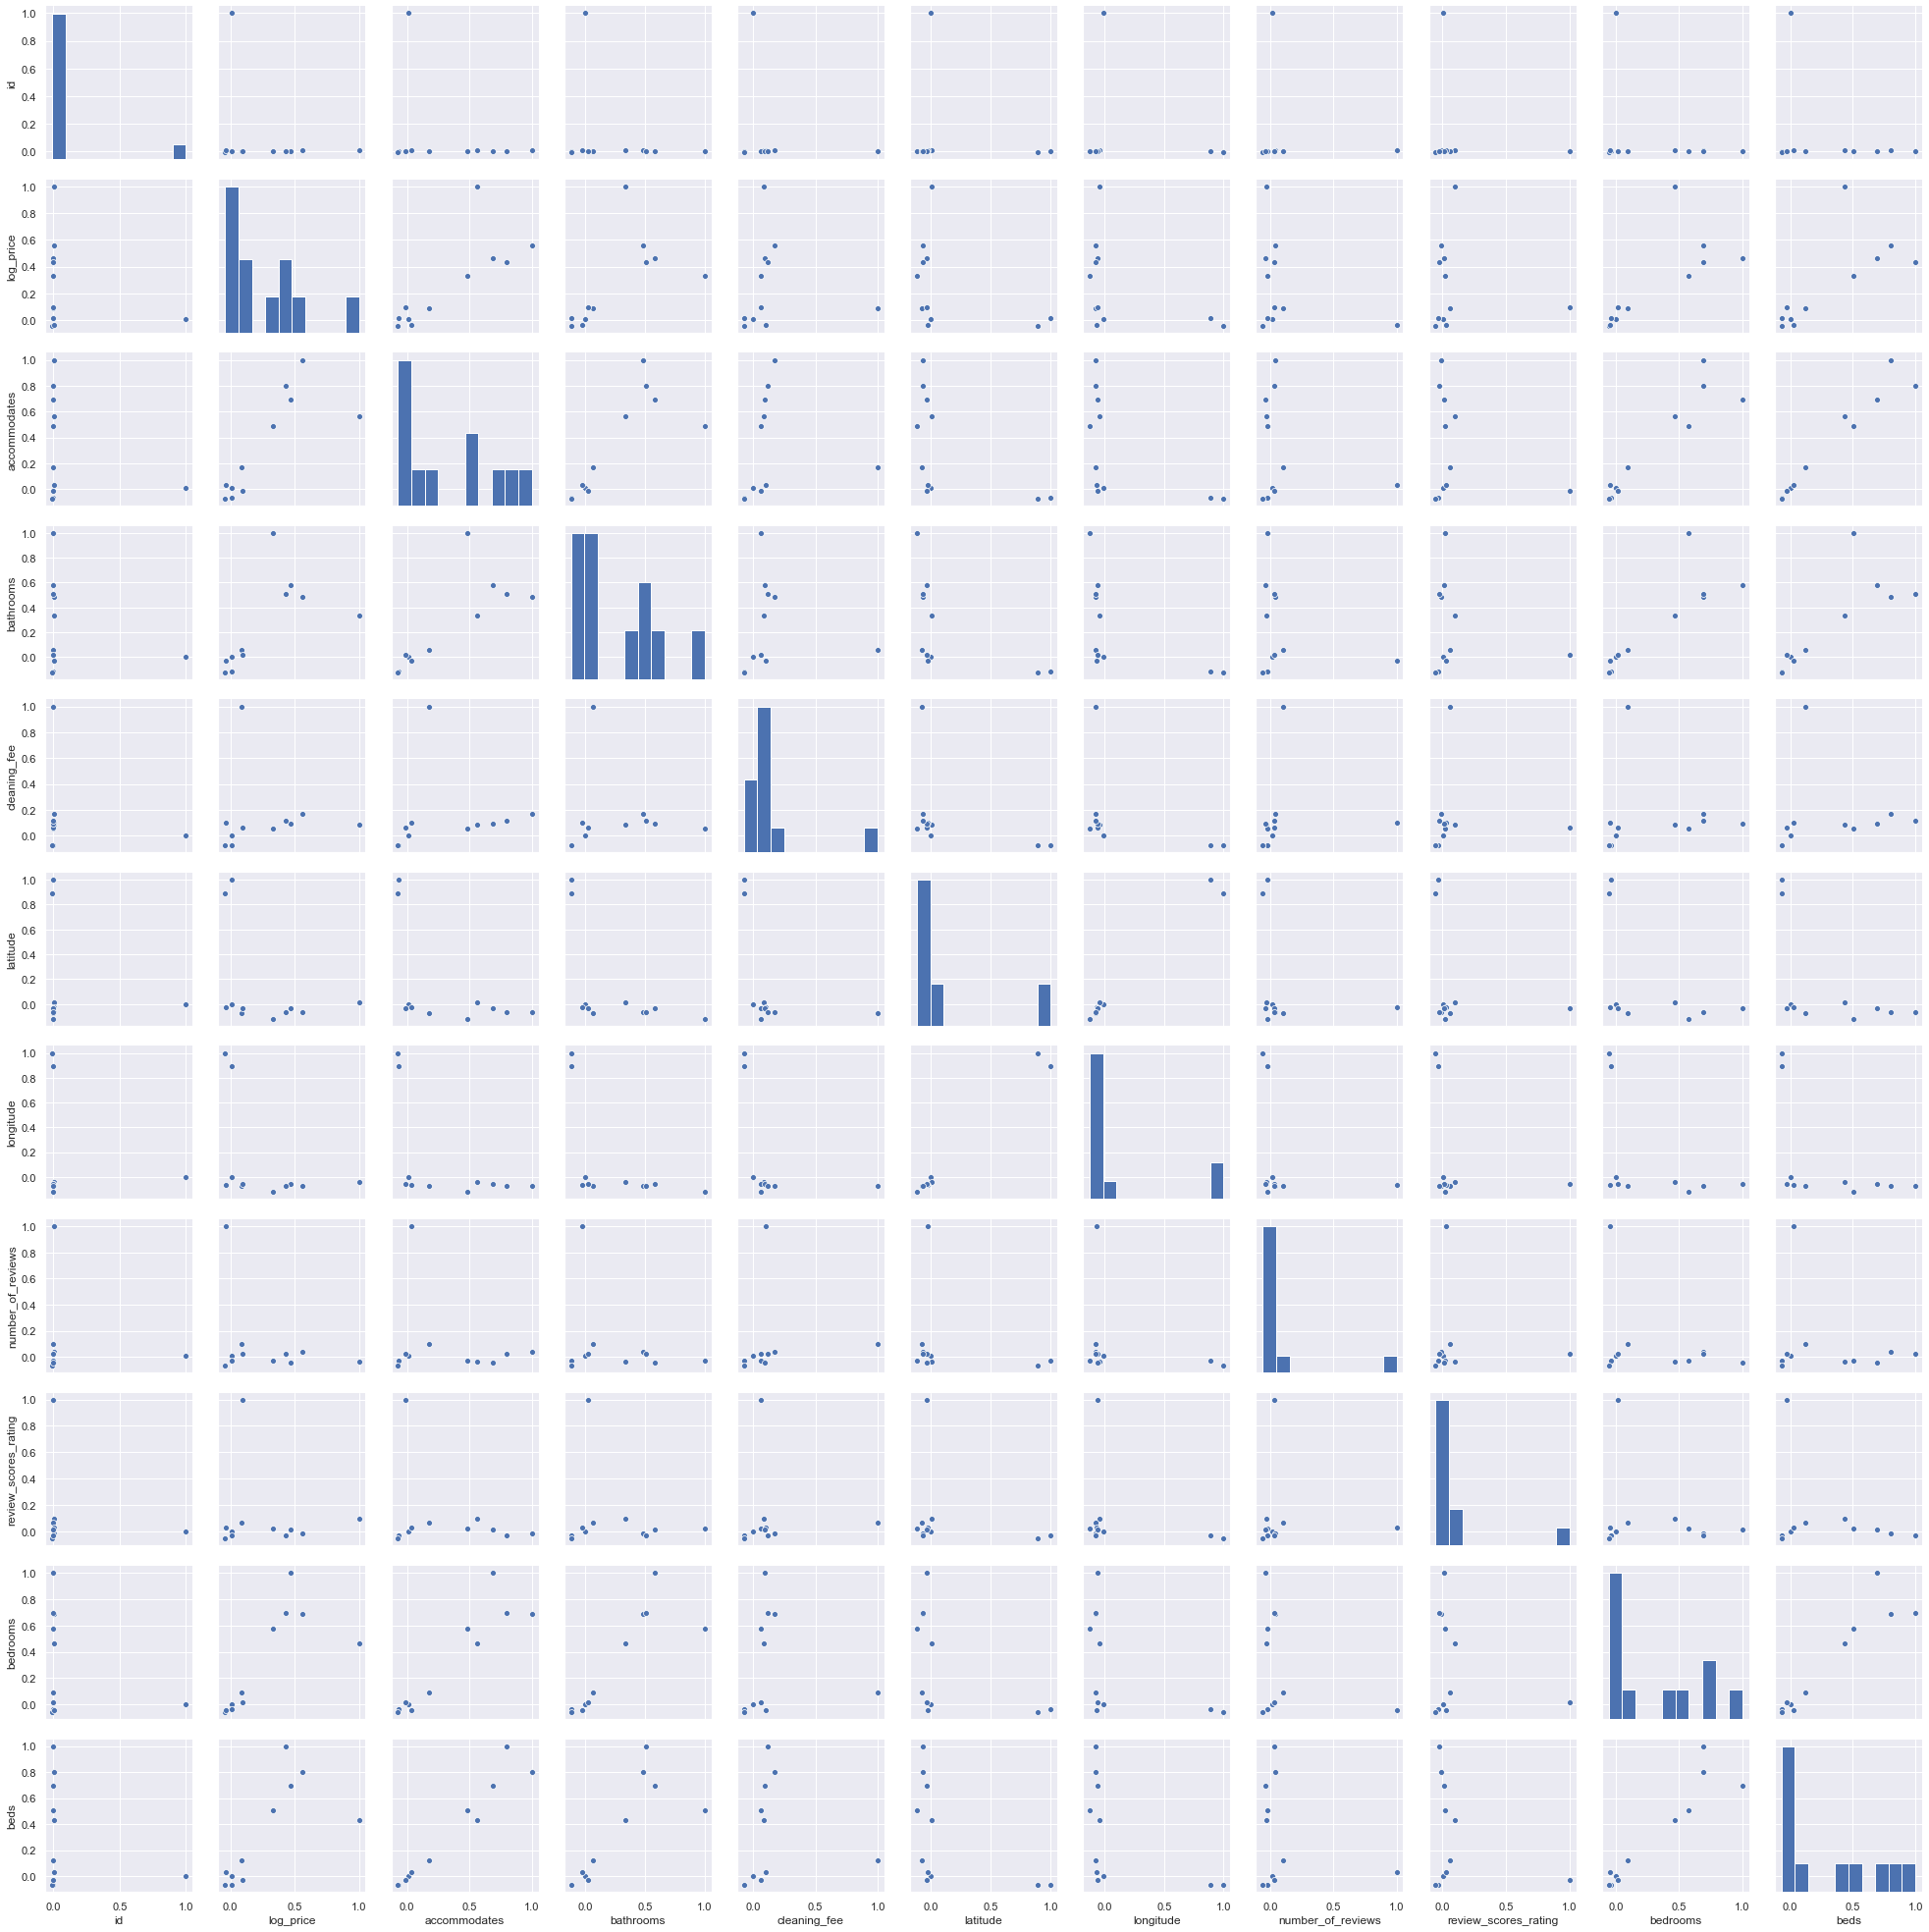

In [15]:
#finding the correlation between features
sns.pairplot(data.corr())

In [16]:
#we will drop all the columns that are of no use
data.drop(['id' , 'room_type' , 'amenities' , 'description' , 'first_review' , 'last_review' , 'latitude' , 'longitude' , 'name' , 'neighbourhood' , 'thumbnail_url' , 'zipcode'], axis = 1, inplace = True)

In [17]:
data.drop(['host_since'], axis = 1, inplace = True)

In [18]:
property=pd.get_dummies(data['property_type'])
property

,Apartment,Bed & Breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Castle,Condominium,Dorm,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Loft,Other,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Treehouse,Vacation home,Villa
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10607,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data['property_type'].nunique()

26

In [20]:
cond = data['property_type'].value_counts()
cond

Apartment             6999
House                 2362
Condominium            364
Townhouse              255
Loft                   189
Other                   81
Bed & Breakfast         74
Guesthouse              73
Bungalow                60
Dorm                    27
Villa                   24
Guest suite             19
In-law                  15
Camper/RV               14
Boutique hotel          10
Hostel                   9
Boat                     8
Cabin                    8
Timeshare                7
Serviced apartment       5
Treehouse                1
Tent                     1
Vacation home            1
Castle                   1
Tipi                     1
Hut                      1
Name: property_type, dtype: int64

In [21]:
threshold = 1000
data['property_type'] = np.where(data['property_type'].isin(cond.index[cond >= threshold ]), data['property_type'], 'miscellaneous')

In [22]:
property=pd.get_dummies(data['property_type'])
property

,Apartment,House,miscellaneous
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
10604,1,0,0
10605,1,0,0
10606,1,0,0
10607,0,0,1


In [23]:
data=pd.concat([data, property ], axis=1 )

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 19 columns):
log_price                 10609 non-null float64
property_type             10609 non-null object
accommodates              10609 non-null int64
bathrooms                 10447 non-null float64
bed_type                  10609 non-null object
cancellation_policy       10609 non-null object
cleaning_fee              10609 non-null bool
city                      10609 non-null object
host_has_profile_pic      10578 non-null object
host_identity_verified    10578 non-null object
host_response_rate        7928 non-null object
instant_bookable          10609 non-null object
number_of_reviews         10609 non-null int64
review_scores_rating      8163 non-null float64
bedrooms                  10600 non-null float64
beds                      10593 non-null float64
Apartment                 10609 non-null uint8
House                     10609 non-null uint8
miscellaneous             1060

In [25]:
# data['cleaning_fee'].value_counts()
data['cleaning_fee']=data['cleaning_fee'].map({True:1,False:0})

In [26]:
data.drop(['bed_type'], axis = 1, inplace = True)

In [27]:
data['cancellation_policy']=data['cancellation_policy'].map({'strict':0,'moderate':1,'flexible':2 })

In [28]:
city=pd.get_dummies(data['city'])
data = pd.concat([data,city], axis=1)

In [29]:
data['host_has_profile_pic']=data['host_has_profile_pic'].map({'t':1,'f':0})
data['host_identity_verified']=data['host_identity_verified'].map({'t':1,'f':0})
data['instant_bookable']=data['instant_bookable'].map({'t':1,'f':0})

In [30]:
data.drop(['property_type' , 'city' ], axis = 1, inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 22 columns):
log_price                 10609 non-null float64
accommodates              10609 non-null int64
bathrooms                 10447 non-null float64
cancellation_policy       10593 non-null float64
cleaning_fee              10609 non-null int64
host_has_profile_pic      10578 non-null float64
host_identity_verified    10578 non-null float64
host_response_rate        7928 non-null object
instant_bookable          10609 non-null int64
number_of_reviews         10609 non-null int64
review_scores_rating      8163 non-null float64
bedrooms                  10600 non-null float64
beds                      10593 non-null float64
Apartment                 10609 non-null uint8
House                     10609 non-null uint8
miscellaneous             10609 non-null uint8
Boston                    10609 non-null uint8
Chicago                   10609 non-null uint8
DC                        1060

In [32]:
#find the missing values
data.isnull().sum()

log_price                    0
accommodates                 0
bathrooms                  162
cancellation_policy         16
cleaning_fee                 0
host_has_profile_pic        31
host_identity_verified      31
host_response_rate        2681
instant_bookable             0
number_of_reviews            0
review_scores_rating      2446
bedrooms                     9
beds                        16
Apartment                    0
House                        0
miscellaneous                0
Boston                       0
Chicago                      0
DC                           0
LA                           0
NYC                          0
SF                           0
dtype: int64

In [33]:
data['bathrooms']=data['bathrooms'].fillna(data['bathrooms'].mode()[0])
data['cancellation_policy']=data['cancellation_policy'].fillna(data['cancellation_policy'].mode()[0])
data['host_has_profile_pic']=data['host_has_profile_pic'].fillna(data['host_has_profile_pic'].mode()[0])
data['host_identity_verified']=data['host_identity_verified'].fillna(data['host_identity_verified'].mode()[0])


In [34]:
data['host_response_rate']

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
10604    100%
10605    100%
10606    100%
10607     90%
10608    100%
Name: host_response_rate, Length: 10609, dtype: object

In [35]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float')
data['host_response_rate']=data['host_response_rate'].fillna(data['host_response_rate'].mean())

In [36]:
data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].mode()[0])

In [37]:
data['beds']=data['beds'].fillna(data['beds'].mode()[0])

In [38]:
data['review_scores_rating'].replace(np.NaN,0,inplace=True)

In [39]:
data.isnull().sum()

log_price                 0
accommodates              0
bathrooms                 0
cancellation_policy       0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
Apartment                 0
House                     0
miscellaneous             0
Boston                    0
Chicago                   0
DC                        0
LA                        0
NYC                       0
SF                        0
dtype: int64

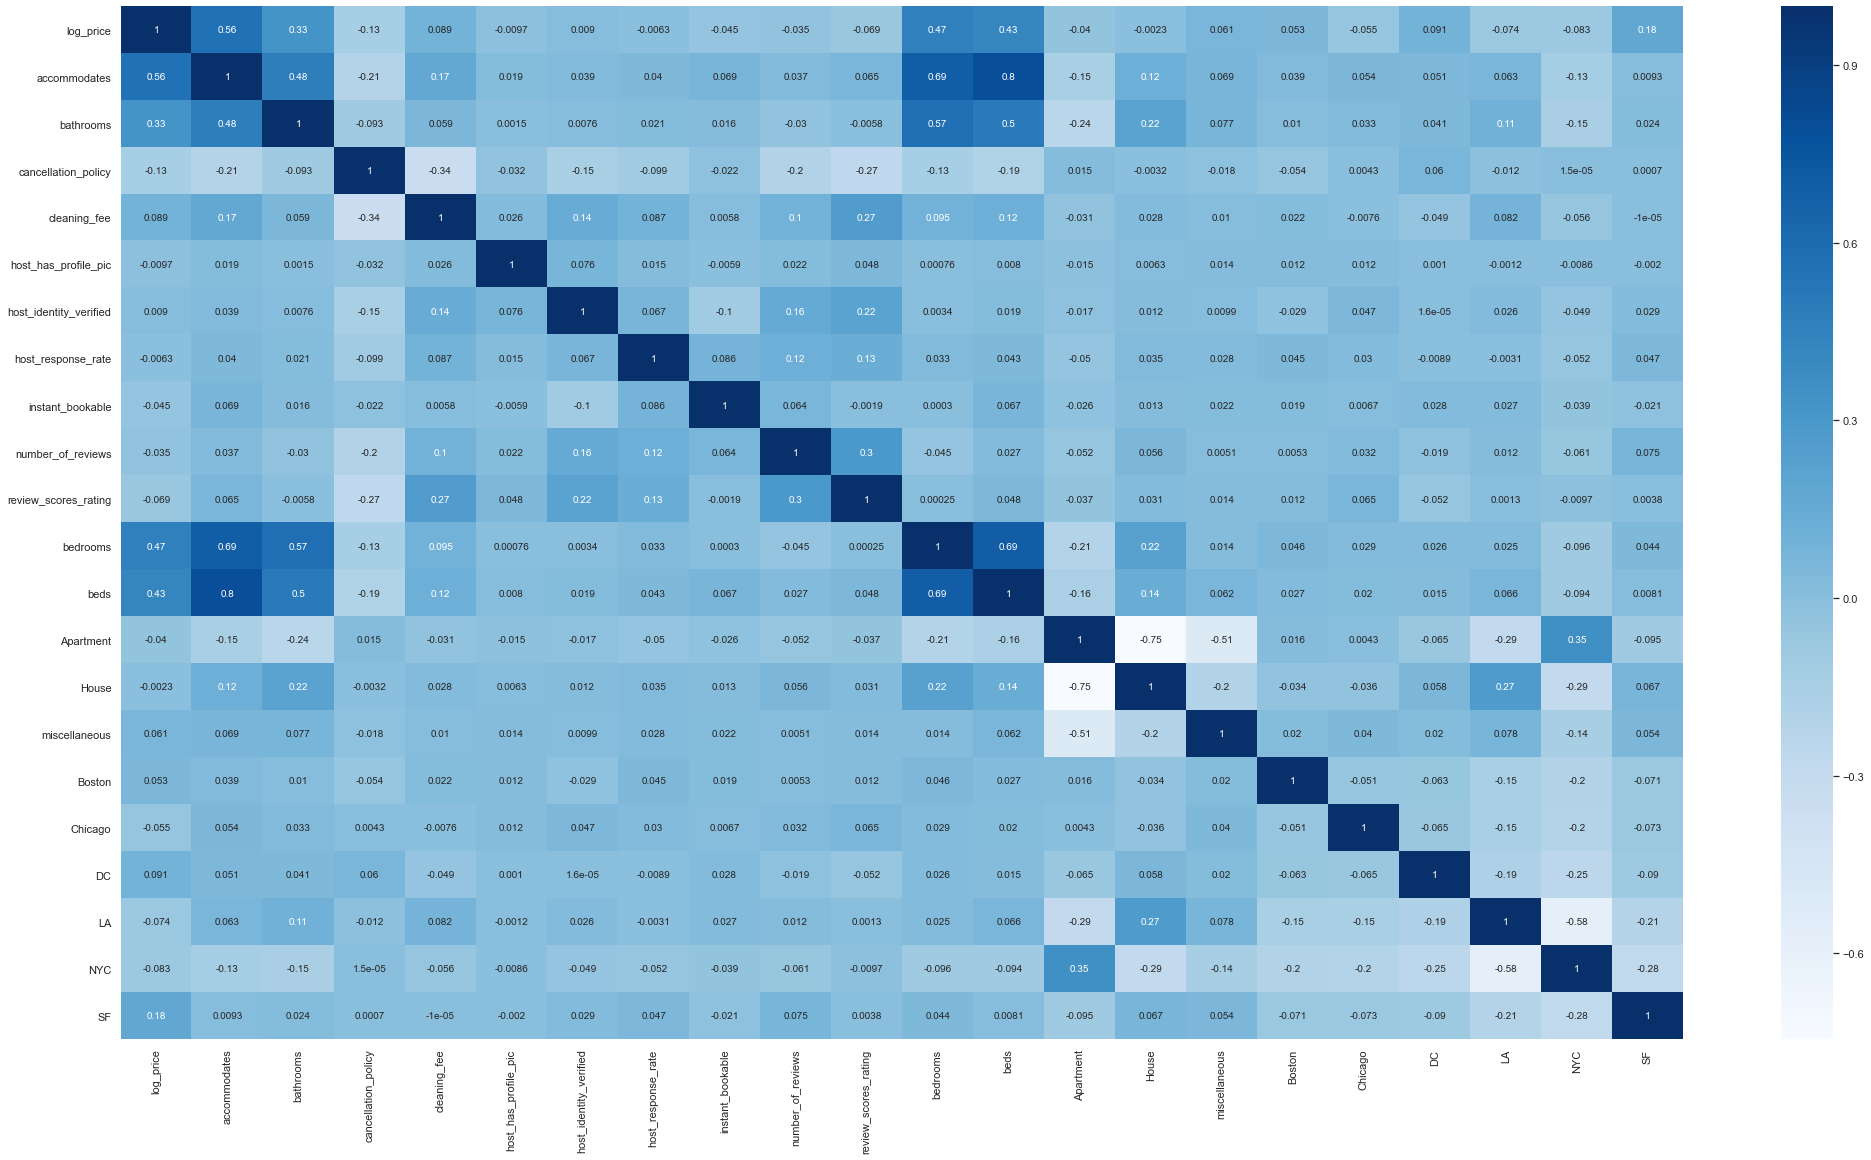

In [40]:
#Heatmap using seaborn indicating pairwise Pearson correlations of numeric variables
plt.figure(figsize=(35,19))
sns.heatmap(data.corr(),cmap="Blues",annot=True)

In [41]:
data.head()

,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Apartment,House,miscellaneous,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,0.0,1,1.0,1.0,94.001514,0,2,100.0,1.0,1.0,1,0,0,0,0,0,0,1,0
1,5.129899,7,1.0,0.0,1,1.0,0.0,100.000000,1,6,93.0,3.0,3.0,1,0,0,0,0,0,0,1,0
2,4.976734,5,1.0,1.0,1,1.0,1.0,100.000000,1,10,92.0,1.0,3.0,1,0,0,0,0,0,0,1,0
3,6.620073,4,1.0,2.0,1,1.0,1.0,94.001514,0,0,0.0,2.0,2.0,0,1,0,0,0,0,0,0,1
4,4.744932,2,1.0,1.0,1,1.0,1.0,100.000000,1,4,40.0,0.0,1.0,1,0,0,0,0,1,0,0,0


In [42]:
data.head()

,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Apartment,House,miscellaneous,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,0.0,1,1.0,1.0,94.001514,0,2,100.0,1.0,1.0,1,0,0,0,0,0,0,1,0
1,5.129899,7,1.0,0.0,1,1.0,0.0,100.000000,1,6,93.0,3.0,3.0,1,0,0,0,0,0,0,1,0
2,4.976734,5,1.0,1.0,1,1.0,1.0,100.000000,1,10,92.0,1.0,3.0,1,0,0,0,0,0,0,1,0
3,6.620073,4,1.0,2.0,1,1.0,1.0,94.001514,0,0,0.0,2.0,2.0,0,1,0,0,0,0,0,0,1
4,4.744932,2,1.0,1.0,1,1.0,1.0,100.000000,1,4,40.0,0.0,1.0,1,0,0,0,0,1,0,0,0


In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 22 columns):
log_price                 10609 non-null float64
accommodates              10609 non-null int64
bathrooms                 10609 non-null float64
cancellation_policy       10609 non-null float64
cleaning_fee              10609 non-null int64
host_has_profile_pic      10609 non-null float64
host_identity_verified    10609 non-null float64
host_response_rate        10609 non-null float64
instant_bookable          10609 non-null int64
number_of_reviews         10609 non-null int64
review_scores_rating      10609 non-null float64
bedrooms                  10609 non-null float64
beds                      10609 non-null float64
Apartment                 10609 non-null uint8
House                     10609 non-null uint8
miscellaneous             10609 non-null uint8
Boston                    10609 non-null uint8
Chicago                   10609 non-null uint8
DC                        1

In [44]:
data['host_response_rate']

0         94.001514
1        100.000000
2        100.000000
3         94.001514
4        100.000000
            ...    
10604    100.000000
10605    100.000000
10606    100.000000
10607     90.000000
10608    100.000000
Name: host_response_rate, Length: 10609, dtype: float64

In [45]:
data.drop(['accommodates' , 'House'], axis = 1, inplace = True )

In [46]:
X = data.drop(['log_price'], axis = 1)
y = data['log_price']

# Scaling

In [101]:
# We have used standard Scaler because the data is in normal form.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

Text(0, 0.5, 'MSE')

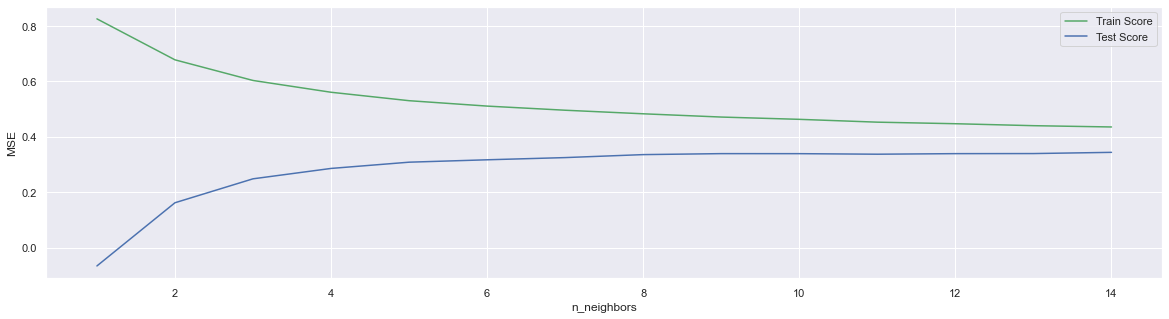

In [49]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,15)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

In [50]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_knn.fit(X_train, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(X_test)
print('The test score is',model_knn.score(X_test,y_test))


KNN: Best Parameters {'n_neighbors': 14}
The test score is 0.3436971219568724


In [51]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train,y_train)
print('Cross-validation scores:',cross_val_score(knn,X_train,y_train) )
print('Cross-validation scores:',cross_val_score(knn,X_test,y_test) )
print('Average Train score:',cross_val_score(knn,X_train,y_train).mean())
print('Average Test score:',cross_val_score(knn,X_test,y_test).mean())

Cross-validation scores: [0.34872142 0.31621449 0.3236693 ]
Cross-validation scores: [0.28454165 0.27757211 0.28210026]
Average Train score: 0.32953507115950126
Average Test score: 0.28140467535293606


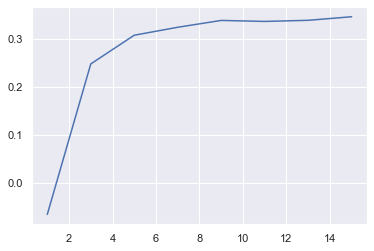

In [52]:
k = [1,3,5,7,9,11,13,15]
test_score=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_test,y_test))
plt.plot(k,test_score)
    
    

# Linear 

In [53]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.3180839562221358
0.30700111686637854


In [54]:
print('Cross-validation scores:',cross_val_score(lreg,X_train,y_train) )
print('Cross-validation scores:',cross_val_score(lreg,X_test,y_test) )
print('Average Train score:',cross_val_score(lreg,X_train,y_train).mean())
print('Average Test score:',cross_val_score(lreg,X_test,y_test).mean())

Cross-validation scores: [0.33866865 0.29867792 0.30117307]
Cross-validation scores: [0.2949763  0.28697257 0.29749042]
Average Train score: 0.3128398787692352
Average Test score: 0.2931464279073757


Text(0.5, 0, 'RM')

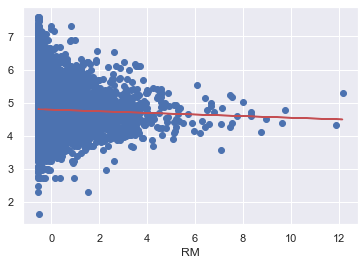

In [94]:
import matplotlib.pyplot as plt

X_train_rm = X_train[:,7].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')


# Polynomial regression

In [56]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print(poly_reg.score(X_train_poly, y_train))
print(poly_reg.score(X_test_poly, y_test))

0.4134476192962525
-5.208778387841232e+18


In [57]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [58]:
print(train_score_list)
print(test_score_list)

[0.3180284186169616, 0.4134476192962525, 0.5146451787920104]
[0.30713108014919344, -5.208778387841232e+18, -1.6640666622189152e+20]


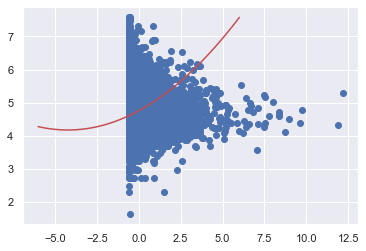

In [59]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train[:,9].reshape(-1,1))
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(-6,6,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,7].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r',label='Truth')

In [60]:
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
print('Cross-validation train scores:',cross_val_score(poly,X_train_poly, y_train) )
print('Cross-validation test scores:',cross_val_score(poly,X_test_poly, y_test) )
print('Average Train score:',cross_val_score(poly,X_train_poly, y_train).mean())
print('Average Test score:',cross_val_score(poly,X_test_poly, y_test).mean())

Cross-validation train scores: [0.22926006 0.22257731 0.22564395]
Cross-validation test scores: [-5.95576055e+14 -4.29491521e+16 -1.75081896e+22]
Average Train score: 0.22582710714010046
Average Test score: -5.836077702980868e+21


# Ridge

In [61]:
from sklearn.linear_model import Ridge

x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [62]:
print(train_score_list)
print(test_score_list)

[0.3180839562221357, 0.31808395622213204, 0.3180839562217649, 0.3180839561850377, 0.31808395251388866, 0.31808358694278593, 0.3180485039562666]
[0.3070011168738558, 0.3070011176140991, 0.307001124343232, 0.3070011915996377, 0.307001860673042, 0.30700820393791384, 0.3070384135316744]


In [63]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_ridge = GridSearchCV(Ridge(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_ridge.fit(X_train, y_train)


print('Ridge: Best Parameters',model_ridge.best_params_)


y_pred_ridge = model_ridge.predict(X_test)
print('The test score is',round(model_ridge.score(X_test,y_test),4))


# Tuning hyper-parameters

Ridge: Best Parameters {'alpha': 100}
The test score is 0.307


In [98]:
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
print('Cross-validation train scores:',cross_val_score(ridge,X_train,y_train) )
print('Cross-validation test scores:',cross_val_score(ridge,X_test,y_test) )
print('Average Train score:',cross_val_score(ridge,X_train,y_train).mean())
print('Average Test score:',cross_val_score(ridge,X_test,y_test).mean())

Cross-validation train scores: [0.33869279 0.29909206 0.30096038]
Cross-validation test scores: [0.29784034 0.2853413  0.30001834]
Average Train score: 0.31291507669676755
Average Test score: 0.2943999929518117


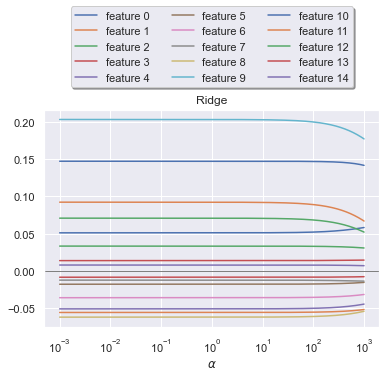

In [100]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,15):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Ridge')
plt.show()

# Lasso

In [66]:
from sklearn.linear_model import Lasso

x_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [67]:
print(train_score_list)
print(test_score_list)

[0.3180839522951001, 0.31804724623322733, 0.31463168036439526, 0.23001837662742897, 0.0, 0.0, 0.0]
[0.3070005444531393, 0.30698666043048783, 0.3034637999587474, 0.22262310919308204, -8.100159128332507e-06, -8.100159128332507e-06, -8.100159128332507e-06]


In [68]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_lasso = GridSearchCV(Lasso(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_lasso.fit(X_train, y_train)


print('Lasso: Best Parameters',model_lasso.best_params_)


y_pred_lasso = model_lasso.predict(X_train)
print(model_lasso.score(X_test,y_test))


# Tuning hyper-parameters

Lasso: Best Parameters {'alpha': 0.0001}
0.30700294903563075


In [69]:
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
print('Cross-validation train scores:',cross_val_score(lasso,X_train,y_train) )
print('Cross-validation test scores:',cross_val_score(lasso,X_test,y_test) )
print('Average Train score:',cross_val_score(lasso,X_train,y_train).mean())
print('Average Test score:',cross_val_score(lasso,X_test,y_test).mean())

Cross-validation train scores: [0.33863298 0.29872009 0.30103087]
Cross-validation test scores: [0.29464139 0.28648826 0.29843589]
Average Train score: 0.312794648699617
Average Test score: 0.29318851268001617


Text(0.5, 1.0, 'Lasso')

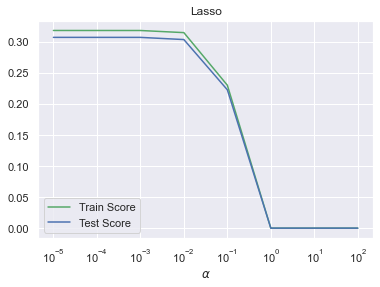

In [70]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Lasso')

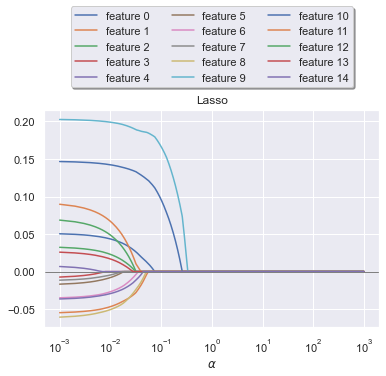

In [71]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,15):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Lasso')
plt.show()

# SVM

In [97]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 1, 10],
                     'C': [0.1, 1, 10]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
                    {'kernel': ['poly'], 'degree': [2,3,4],
                     'C': [0.1, 1, 10]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)


print('SVM: Best Parameters',model.best_params_)


y_pred_svr = model.predict(X_test)
print('The test score is', round(model.score(X_test,y_test),4))


# Tuning hyper-parameters

SVM: Best Parameters {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
The test score is 0.3908


In [73]:
svrrbf = SVR(kernel='rbf',gamma=0.1,C=1)
svrrbf.fit(X_train, y_train)
print('Cross-validation scores:',cross_val_score(svrrbf,X_train, y_train) )
print('Cross-validation scores:',cross_val_score(svrrbf,X_test, y_test) )
print('Average Train score:',cross_val_score(svrrbf,X_train, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,X_test, y_test).mean())

Cross-validation scores: [0.38341364 0.37117073 0.37205957]
Cross-validation scores: [0.28921383 0.31446044 0.36357317]
Average Train score: 0.3755479794227902
Average Test score: 0.322415814650621


# Linear SVR

[-0.041650523046691035, 0.29965069520869936, 0.30256802064929234, 0.2994573676936123, 0.2839029340840825, -0.08052071054992749, -0.5045499959374393]
[-0.06107594409209782, 0.28311573744465135, 0.28659182325042265, 0.28335672611768226, 0.26314313703517467, -0.127815661035243, -0.5295027347992667]


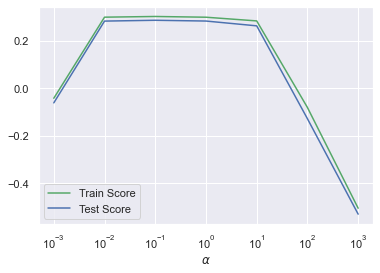

In [74]:
from sklearn.svm import LinearSVR

train_score_list = []
test_score_list = []
C= [0.001,0.01,0.1,1,10,100,1000]

for i in C: 
    clf = LinearSVR(C=i)
    clf.fit(X_train,y_train)
    train_score_list.append(clf.score(X_train,y_train))
    test_score_list.append(clf.score(X_test, y_test))


import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
print(train_score_list)
print(test_score_list)

In [75]:
tuned_parameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}]

print("# Tuning hyper-parameters")
print()

model_linsvr = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_linsvr.fit(X_train, y_train)


print('SVM: Best Parameters',model_linsvr.best_params_)


y_pred_linsvr = model_linsvr.predict(X_train)
print('The test score is', round(model_linsvr.score(X_test,y_test),4))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 0.1}
The test score is 0.2869


In [76]:
svr = LinearSVR(C=0.1)
svr.fit(X_train, y_train)
print('Cross-validation scores:',cross_val_score(svr,X_train, y_train) )
print('Cross-validation scores:',cross_val_score(svr,X_test, y_test) )
print('Average Train score:',cross_val_score(svr,X_train, y_train).mean())
print('Average Test score:',cross_val_score(svr,X_test, y_test).mean())

Cross-validation scores: [0.32454935 0.29441775 0.27558778]
Cross-validation scores: [0.30447968 0.2685862  0.26906584]
Average Train score: 0.2981349024329782
Average Test score: 0.28006119764025367


# Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

print("# Tuning hyper-parameters")
print()

model_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_tree.fit(X_train, y_train)


print('SVM: Best Parameters',model_tree.best_params_)


y_pred_svr = model_tree.predict(X_test)
print(model_tree.score(X_test,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'max_depth': 7}
0.40078406206188033


In [78]:
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(X_train, y_train)
print('Cross-validation scores:',cross_val_score(tree,X_train, y_train) )
print('Cross-validation scores:',cross_val_score(tree,X_test, y_test) )
print('Average Train score:',cross_val_score(tree,X_train, y_train).mean())
print('Average Test score:',cross_val_score(tree,X_test, y_test).mean())

Cross-validation scores: [0.36581756 0.37451757 0.3713425 ]
Cross-validation scores: [0.26304427 0.33818165 0.32708797]
Average Train score: 0.3694089813041961
Average Test score: 0.31381564324017547


# Summary

##### Best Model SVM - rbf 

In [96]:
print('Average Train score:',cross_val_score(svrrbf,X_train, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,X_test, y_test).mean())

Average Train score: 0.3755479794227902
Average Test score: 0.322415814650621


In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_svr))
rms

0.5551128676567022